Alumno: Milton Aldair Martínez Acosta  

Matrícula: 1870354

Estadística Aplicada

Grupo: 051

# Problema 2

## a)

In [85]:
import matplotlib.pyplot as plt, numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline

In [86]:
#fijar el tamaño de las graficas
plt.rcParams['figure.figsize'] = [10, 7.5]

## b)

In [175]:
IGAE = pd.read_csv('https://raw.githubusercontent.com/Miltonmtz/Tareas_EstadisticaAplicada_22/master/IGAEp2.csv',index_col='Periodo', parse_dates = True)

In [178]:
IGAE.head()

,value
Periodo,
ene-93,60.41
feb-93,61.02
mar-93,63.94
abr-93,61.87
may-93,63.61


In [179]:
IGAE.rename(columns = {'IGAE (base 2013)': 'value'}, inplace = True)

## c)

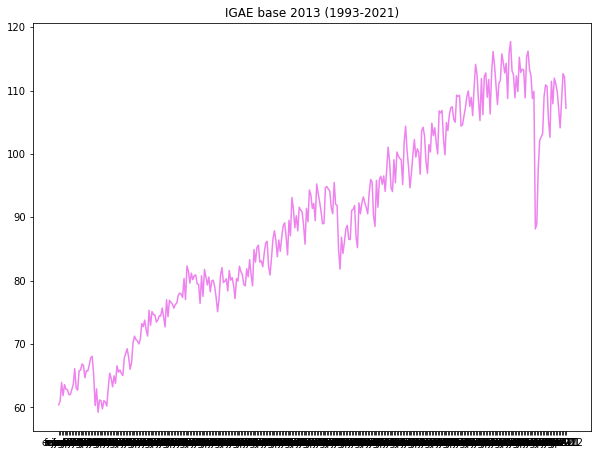

In [180]:
#graficamos
plt.plot(IGAE, "violet")
plt.title(r'IGAE base 2013 (1993-2021)')
plt.show()

## d)

Hay patrones estacionales, los meses en los que menos actividad económica de cada año repetidamente son febrero y septiembre, mientras que el mayor punto en varios años es noviembre. 

## e)

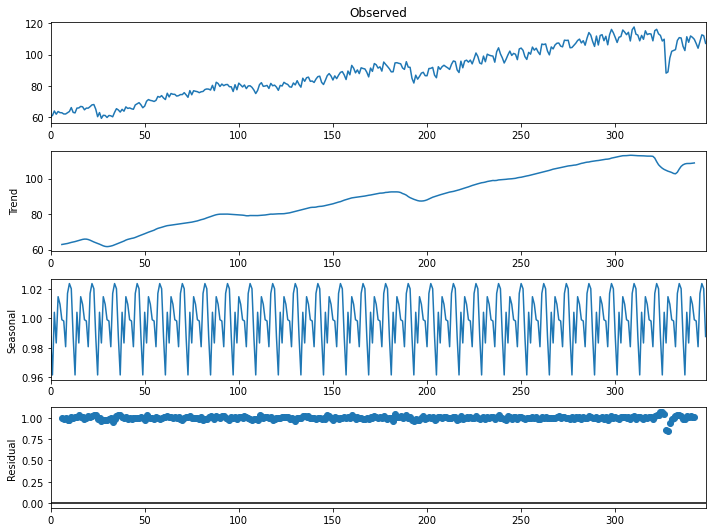

In [207]:
result = seasonal_decompose(IGAE['value'].values, model='multiplicative', period=12)  #mul tambien funciona
result.plot();

In [198]:
#vamos a obtener la serie desestacionalizada
#primero obtenemos el componente estacional al que accedemos con .seasonal del objeto result
componente_estacional = result.seasonal
IGAE['desestacionalizado'] = IGAE['value'] / componente_estacional

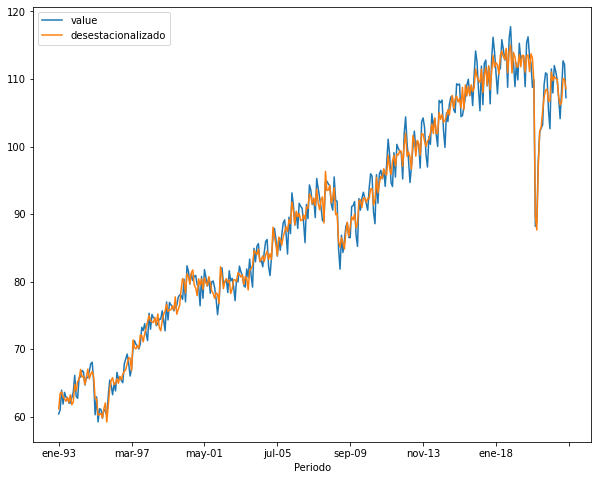

In [188]:
#graficamos
IGAE[['value','desestacionalizado']].plot(figsize=(10,8));

## f)

### Prueba adfuller serie desestacionalizada

In [189]:
#hacemos la prueba de dickey fuller aumentada ADF
adf = adfuller(IGAE['desestacionalizado'])

#presentamos el p-value
print('p-value: %f' % adf[1])


p-value: 0.717763


In [190]:
if adf[1] < 0.05:
    
    print(f'con un un p-value={adf[1]}\n Se rechaza hipótesis nula, serie estacionaria') 
    
else:
    
    print(f'con un un p-value = {adf[1]}\n NO se rechaza hipótesis nula, serie no estacionaria') 


con un un p-value = 0.7177634299035303
 NO se rechaza hipótesis nula, serie no estacionaria


## g)

### Prueba adfuller serie desestacionalizada y diferenciada 1 vez

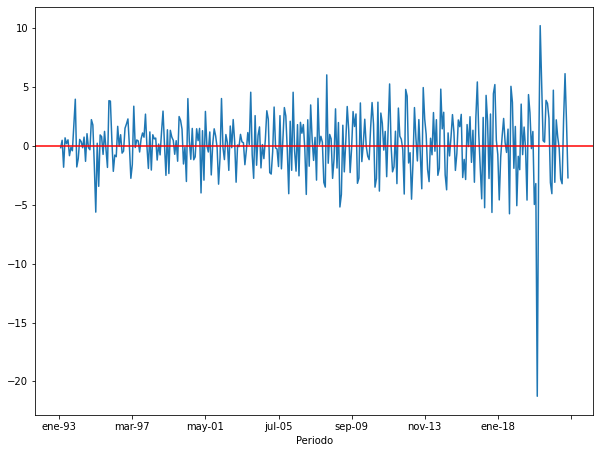

In [210]:
#diferenciando la serie
IGAE['aux'] = IGAE['desestacionalizado'].shift(+1)
IGAE['est'] = [IGAE.loc[ei, 'value'] - IGAE.loc[ei, 'aux'] for ei in IGAE.index]
IGAE['est'].plot()
plt.axhline(y=0, color='red')
plt.show()

In [192]:
IGAE.head()

,value,desestacionalizado,aux,est
Periodo,,,,
ene-93,60.41,61.163741,NaN,NaN
feb-93,61.02,63.458383,61.163741,-0.143741
mar-93,63.94,63.675604,63.458383,0.481617
abr-93,61.87,62.920228,63.675604,-1.805604
may-93,63.61,62.685704,62.920228,0.689772


In [193]:
est = IGAE[['est']].copy()

In [194]:
est.head()

,est
Periodo,
ene-93,NaN
feb-93,-0.143741
mar-93,0.481617
abr-93,-1.805604
may-93,0.689772


In [195]:
est= est.dropna()

In [196]:
#hacemos la prueba de dickey fuller aumentada ADF
adf1 = adfuller(est)

#presentamos el p-value
print('p-value: %f' % adf1[1])


p-value: 0.000072


In [197]:
if adf1[1] < 0.05:
    
    print(f'con un un p-value={adf1[1]}\n Se rechaza hipótesis nula, serie estacionaria') 
    
else:
    
    print(f'con un un p-value = {adf1[1]}\n NO se rechaza hipótesis nula, serie no estacionaria') 


con un un p-value=7.166263611446318e-05
 Se rechaza hipótesis nula, serie estacionaria


El **grado de integracion** de la serie es 1 ya que despues de diferenciarla una vez, obtuvimos una serie estacionaria

## h)

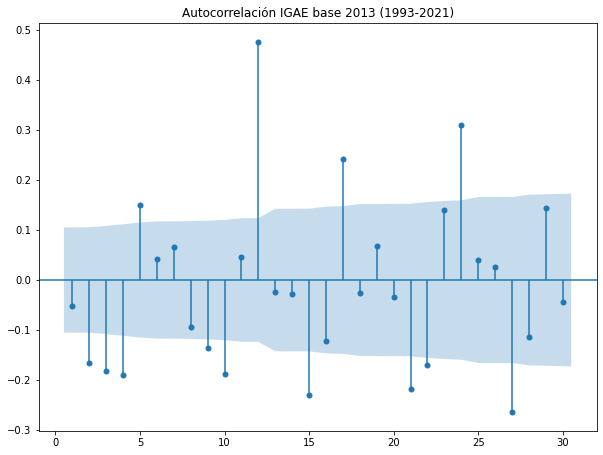

In [208]:
#graficamos función de autocorrelación
plot_acf(est, zero=False, lags=30)
plt.title(r'Autocorrelación IGAE base 2013 (1993-2021)')
plt.show()

Observamos que el primer rezago relevante es el 1, lo que nos sugiere un MA(2)

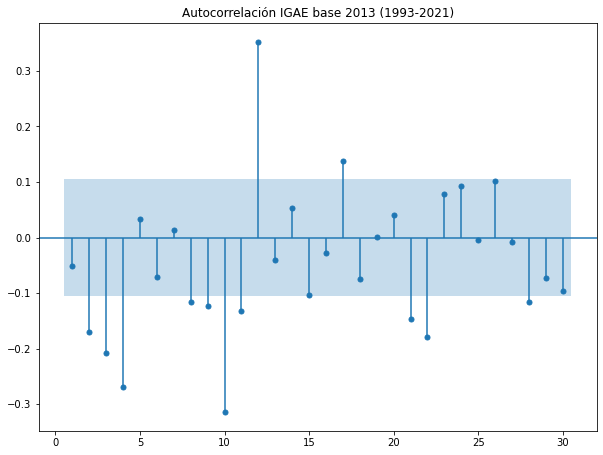

In [209]:
#graficamos función de autocorrelación parcial
plot_pacf(est, zero=False, lags=30)
plt.title(r'Autocorrelación IGAE base 2013 (1993-2021)')
plt.show()  

Observamos que el primer rezago relevante es el primero, lo que nos sugiere un AR(2)

Con base en las graficas ACF Y PACF podemos modelar nuestros datos con un ARMA(2,2)

## i)

### ARMA(2,2)

In [59]:
# estimamos un ARMA (2,2)
modelo22 = ARIMA(est, order=(2, 0, 2))
resultado = modelo22.fit()
resultado.summary()

C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    est   No. Observations:                  348
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -848.730
Date:                Sun, 27 Mar 2022   AIC                           1709.460
Time:                        19:20:57   BIC                           1732.574
Sample:                             0   HQIC                          1718.662
                                - 348                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1365      0.049      2.782      0.005       0.040       0.233
ar.L1         -0.3833      0.141     -2.712      0.007      -0.660      -0.106
ar.L2          0.2912      0.128      2.279      0.023       0.041       0.542
ma.L1          0.0179      0.132      0.135      0.893      -0.241       0.277
ma.L2         -0.7114      0.125     -5.670      0.000      -0.957      -0.465
sigma2         7.6758      0.275     27.922      0.000       7.137       8.215
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              3029.17
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               4.20   Skew:                            -1.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### ARMA(3,3)

In [61]:
# estimamos un ARMA (3,3)
modelo33 = ARIMA(est, order=(3, 0, 3))
resultado = modelo33.fit()
resultado.summary()

C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    est   No. Observations:                  348
Model:                 ARIMA(3, 0, 3)   Log Likelihood                -818.448
Date:                Sun, 27 Mar 2022   AIC                           1652.895
Time:                        19:23:46   BIC                           1683.713
Sample:                             0   HQIC                          1665.164
                                - 348                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1500      0.010     15.367      0.000       0.131       0.169
ar.L1         -0.9462      0.029    -32.883      0.000      -1.003      -0.890
ar.L2          0.3564      0.051      6.943      0.000       0.256       0.457
ar.L3          0.7827      0.030     26.520      0.000       0.725       0.841
ma.L1          0.7153      0.039     18.178      0.000       0.638       0.792
ma.L2         -0.7144      0.061    -11.753      0.000      -0.834      -0.595
ma.L3         -0.9920      0.056    -17.720      0.000      -1.102      -0.882
sigma2         6.2866      0.413     15.211      0.000       5.477       7.097
===================================================================================
Ljung-Box (L1) (Q):                   2.44   Jarque-Bera (JB):              1724.08
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               4.49   Skew:                            -1.32
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### ARMA(4,3)

In [239]:
# estimamos un ARMA (4,3)
modelo43 = ARIMA(est, order=(4, 0, 3))
resultadof = modelo43.fit()
resultadof.summary()

C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    est   No. Observations:                  348
Model:                 ARIMA(4, 0, 3)   Log Likelihood                -793.923
Date:                Sun, 27 Mar 2022   AIC                           1605.846
Time:                        22:32:23   BIC                           1640.516
Sample:                             0   HQIC                          1619.648
                                - 348                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1384      0.052      2.652      0.008       0.036       0.241
ar.L1         -0.9710      0.059    -16.571      0.000      -1.086      -0.856
ar.L2          0.0254      0.108      0.235      0.814      -0.187       0.237
ar.L3          0.2608      0.110      2.362      0.018       0.044       0.477
ar.L4         -0.2855      0.060     -4.750      0.000      -0.403      -0.168
ma.L1          0.8912      0.069     12.833      0.000       0.755       1.027
ma.L2         -0.4110      0.087     -4.730      0.000      -0.581      -0.241
ma.L3         -0.8165      0.072    -11.323      0.000      -0.958      -0.675
sigma2         5.5169      0.278     19.868      0.000       4.973       6.061
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3950.81
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               3.57   Skew:                            -1.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### ARMA(4,4)

In [219]:
# estimamos un ARMA (4,4)
modelo44 = ARIMA(est, order=(4, 0, 4))
resultado = modelo44.fit()
resultado.summary()

C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    est   No. Observations:                  348
Model:                 ARIMA(4, 0, 4)   Log Likelihood                -801.722
Date:                Sun, 27 Mar 2022   AIC                           1623.444
Time:                        22:16:03   BIC                           1661.966
Sample:                             0   HQIC                          1638.781
                                - 348                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1383      0.048      2.902      0.004       0.045       0.232
ar.L1         -0.3356      0.174     -1.934      0.053      -0.676       0.005
ar.L2         -0.5102      0.129     -3.955      0.000      -0.763      -0.257
ar.L3         -0.1091      0.158     -0.689      0.491      -0.419       0.201
ar.L4          0.2478      0.128      1.937      0.053      -0.003       0.499
ma.L1          0.1825      0.163      1.117      0.264      -0.138       0.503
ma.L2          0.2187      0.119      1.839      0.066      -0.014       0.452
ma.L3         -0.2629      0.130     -2.024      0.043      -0.518      -0.008
ma.L4         -0.6291      0.137     -4.603      0.000      -0.897      -0.361
sigma2         5.8467      0.209     27.948      0.000       5.437       6.257
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7447.82
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               3.90   Skew:                            -2.59
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [211]:
ic = {}
for ar in range(5):
    for ma in range(5):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(est, order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])
ic

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\stat

AR: 0, MA: 3
AR: 0, MA: 4


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\stat

AR: 1, MA: 0
AR: 1, MA: 1


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\stat

AR: 1, MA: 2
AR: 1, MA: 3


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\stat

AR: 1, MA: 4


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 2, MA: 0
AR: 2, MA: 1


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\stat

AR: 2, MA: 2


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 2, MA: 3


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 2, MA: 4


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 3, MA: 0
AR: 3, MA: 1


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\stat

AR: 3, MA: 2


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 3, MA: 3


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 3, MA: 4


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 4, MA: 0
AR: 4, MA: 1


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\stat

AR: 4, MA: 2


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 4, MA: 3


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\

AR: 4, MA: 4


AIC          BIC
AR MA                          
0  0   1676.313087  1684.017492
   1   1676.866670  1688.423278
   2   1648.502702  1663.911512
   3   1638.727083  1657.988096
   4   1630.028242  1653.141457
1  0   1677.398366  1688.954973
   1   1641.651659  1657.060469
   2   1636.778196  1656.039209
   3   1636.875675  1659.988890
   4   1626.568625  1653.534042
2  0   1669.388986  1684.797796
   1   1635.002595  1654.263608
   2   1635.897037  1659.010252
   3   1634.676409  1661.641827
   4   1621.959863  1652.777483
3  0   1656.037498  1675.298510
   1   1635.130671  1658.243886
   2   1637.130425  1664.095842
   3   1638.309695  1669.127315
   4   1623.954921  1658.624743
4  0   1631.976394  1655.089609
   1   1633.176494  1660.141911
   2   1632.625984  1663.443604
   3   1605.845691  1640.515513
   4   1623.444174  1661.966199

In [215]:
ic.sort_values('BIC', ascending = True)

AIC          BIC
AR MA                          
4  3   1605.845691  1640.515513
2  4   1621.959863  1652.777483
0  4   1630.028242  1653.141457
1  4   1626.568625  1653.534042
2  1   1635.002595  1654.263608
4  0   1631.976394  1655.089609
1  2   1636.778196  1656.039209
   1   1641.651659  1657.060469
0  3   1638.727083  1657.988096
3  1   1635.130671  1658.243886
   4   1623.954921  1658.624743
2  2   1635.897037  1659.010252
1  3   1636.875675  1659.988890
4  1   1633.176494  1660.141911
2  3   1634.676409  1661.641827
4  4   1623.444174  1661.966199
   2   1632.625984  1663.443604
0  2   1648.502702  1663.911512
3  2   1637.130425  1664.095842
   3   1638.309695  1669.127315
   0   1656.037498  1675.298510
0  0   1676.313087  1684.017492
2  0   1669.388986  1684.797796
0  1   1676.866670  1688.423278
1  0   1677.398366  1688.954973

In [214]:
ic.sort_values('AIC', ascending = True)

AIC          BIC
AR MA                          
4  3   1605.845691  1640.515513
2  4   1621.959863  1652.777483
4  4   1623.444174  1661.966199
3  4   1623.954921  1658.624743
1  4   1626.568625  1653.534042
0  4   1630.028242  1653.141457
4  0   1631.976394  1655.089609
   2   1632.625984  1663.443604
   1   1633.176494  1660.141911
2  3   1634.676409  1661.641827
   1   1635.002595  1654.263608
3  1   1635.130671  1658.243886
2  2   1635.897037  1659.010252
1  2   1636.778196  1656.039209
   3   1636.875675  1659.988890
3  2   1637.130425  1664.095842
   3   1638.309695  1669.127315
0  3   1638.727083  1657.988096
1  1   1641.651659  1657.060469
0  2   1648.502702  1663.911512
3  0   1656.037498  1675.298510
2  0   1669.388986  1684.797796
0  0   1676.313087  1684.017492
   1   1676.866670  1688.423278
1  0   1677.398366  1688.954973

Los dos criterios me señalan un ARMA(4,3)

## j)

### MAPE para ARMA(4,3)

In [221]:
len(est)

348

In [222]:
est43 = est

In [231]:
## removeremos la fecha
est43 = est43.reset_index()

In [ ]:
### eliminamos columna fecha
est43 = est43.drop(['Periodo'], axis=1)

In [232]:
est43.index = est43.index + 1

In [228]:
# vamos a estimar la serie con el modelo ARMA (2,2)
est43['pronostico'] = resultadof.predict(1,348)

C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [235]:
est43

,est,pronostico
1,-0.143741,0.151436
2,0.481617,0.177220
3,-1.805604,0.305983
4,0.689772,0.546661
5,0.194296,0.323406
...,...,...
344,-3.209432,2.434187
345,2.186563,1.795012
346,6.140851,-0.658976
347,2.065722,-1.759761


In [220]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            print("Hay un 0")
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [236]:
MAPE43 = mean_absolute_percentage_error(est43['est'], est43['pronostico'])
MAPE43

214.7240725405807

### MAD para ARMA(4,3)

In [241]:
def deviation(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j])
        else:
            print("Hay un 0")
    return res

def mean_absolute_deviation(y_true, y_pred): 
    return np.mean(np.abs(deviation(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [242]:
MAD43 = mean_absolute_deviation(est43['est'], est43['pronostico'])
MAD43

217.4119575132873

## k)

Como ambos indicadores nos sugirieron el mismo modelo, vamos a usar un ARMA(4,3)

## l)

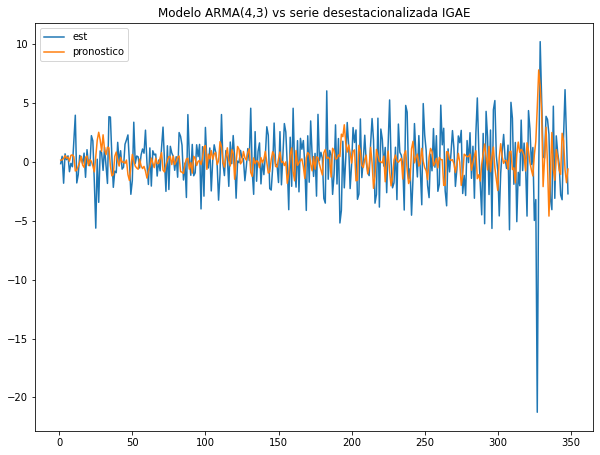

In [238]:
est43[['est', 'pronostico']].plot()
plt.title('Modelo ARMA(4,3) vs serie desestacionalizada IGAE')
plt.show()

## m)

In [243]:
resultadof.predict(349,353)

C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


349    1.558475
350   -1.601924
351    1.973867
352   -0.549244
353   -0.006508
Name: predicted_mean, dtype: float64

## n)

In [245]:
resultadof.predict(349,379)

C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


349    1.558475
350   -1.601924
351    1.973867
352   -0.549244
353   -0.006508
354    1.237197
355   -1.635535
356    2.047353
357   -1.432300
358    0.935740
359    0.328599
360   -0.980622
361    1.886195
362   -1.765139
363    1.685028
364   -0.636416
365   -0.065351
366    1.263385
367   -1.602727
368    2.025707
369   -1.386818
370    0.892106
371    0.357111
372   -0.991375
373    1.872995
374   -1.732702
375    1.642252
376   -0.594430
377   -0.094979
378    1.272804
379   -1.589464
Name: predicted_mean, dtype: float64

A partir del mes 12, la siguiente prediccion es practicamente identica a la primera y asi sucesivamente